# Objective

```
=========================================================
Program ini dibuat untuk menganalisis data penjualan perusahaan Nike dan preferensi pelanggan untuk mengidentifikasi faktor kunci yang mempengaruhi pertumbuhan penjualan, guna meningkatkan strategi pemasaran dan mencapai pertumbuhan yang lebih tinggi.
=========================================================

Link Tableau : https://public.tableau.com/shared/WKB6RNMQN?:display_count=n&:origin=viz_share_link

# Identifikasi Masalah

Permasalahan yang dihadapi dalam konteks ini adalah Perusahaan Nike kesulitan untuk mengidentifikasi tren pasar yang tepat, produk terlaris, dan preferensi pelanggan yang terus berkembang. Selain itu, perusahaan juga menghadapi tantangan dalam memahami faktor-faktor yang menyebabkan fluktuasi dalam penjualan, baik itu penurunan maupun peningkatan. Dalam industri yang sangat kompetitif, perubahan perilaku konsumen dan strategi pesaing yang cepat memerlukan Nike untuk terus beradaptasi dengan cepat. Tanpa pemahaman yang mendalam mengenai pola penjualan dan faktor-faktor yang mempengaruhinya, Nike mungkin kesulitan dalam menyusun strategi pemasaran yang efektif, yang bisa berdampak pada daya saing dan pertumbuhan penjualannya.

# Pemahaman Bisnis


```
Metode SMART 

**Specific**    : Meningkatkan penjualan produk melalui strategi pemasaran berbasis analisis tren pasar yang lebih efektif dan responsif terhadap perubahan preferensi pelanggan.
**Measurable**  : Peningkatan penjualan sebesar 10% dalam 6 bulan atau peningkatan pangsa pasar sebesar 5% melalui kampanye pemasaran yang lebih terarah
**Achievable**  : Dengan menggunakan analisis data penjualan dan preferensi pelanggan, tim pemasaran akan merancang kampanye pemasaran yang realistis dan dapat diterapkan untuk memenuhi kebutuhan pasar yang dinamis.
**Relevant**    : Strategi ini akan meningkatkan daya saing Nike dalam menghadapi pesaing dan memperkuat posisi pasar, yang mendukung tujuan pertumbuhan jangka panjang perusahaan.
**Time-Bound**  : Analisis dan penerapan strategi pemasaran harus dilakukan dalam 3 bulan pertama, dan evaluasi hasilnya dilakukan pada akhir bulan ke-6 untuk penyesuaian strategi lebih lanjut.

## Problem Statement

Dalam periode 3-6 bulan, Nike akan menganalisis data penjualan dan preferensi pelanggan untuk mengidentifikasi faktor kunci yang mempengaruhi pertumbuhan penjualan, guna meningkatkan strategi pemasaran dan mencapai pertumbuhan yang lebih tinggi.



# Topik Permasalahan

Nike menghadapi tantangan dalam mengidentifikasi tren pasar, memahami preferensi pelanggan, dan menganalisis faktor yang mempengaruhi fluktuasi penjualan, sehingga diperlukan strategi pemasaran berbasis data untuk meningkatkan daya saing dan pertumbuhan penjualan.

Pertanyaan untuk menjawab analisa nantinya, sebagai berikut:

1. Berapa Rata-rata penjualan perwilayah?
2. Bagaimana pengaruh harga terhadap volume penjualan
3. Wilayah mana yang memiliki penurunan ditribusi penjualan paling rendah? 
4. Produk atau kategori apa yang memiliki tingkat penjualan rendah? 
5. Pada bulan berapa persentase penjualan online mengalami penurunan ? 
6. Apakah ada pola penjualan tertentu dalam tahun? 

'''
Tentang Dataset

Nike Global Sales Data (2024)

Dataset :
Bulan (Month): Bulan aktivitas penjualan.
Wilayah (Region): Wilayah geografis (misalnya, Tiongkok Raya, Eropa, Amerika).
Kategori Utama (Main Category): Kategori produk tingkat tinggi (Alas Kaki, Pakaian, Peralatan).
Sub Kategori: Sub-kategori tertentu dalam kategori utama.
Lini Produk(Sub Category): Seri atau model produk tertentu.
Tingkat Harga (Price Tier): Segmen harga (Premium, Kelas Menengah, Anggaran).
Unit Terjual(Units Sold): Jumlah barang yang terjual.
Pendapatan (USD): Total pendapatan dalam Dolar AS.
Persentase Penjualan Online (Online Sales Percentage): Persentase penjualan melalui platform online.
Harga Eceran (Retail Price) : Harga eceran per unit dalam USD.

# A. Data Loading

In [ ]:
# Keperluan Module
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
import plotly.express as px


In [213]:
# Menampilkan data dalam variabel df
df = pd.read_csv("nike_sales_2024.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    1000 non-null   object
 1   Region                   1000 non-null   object
 2   Main_Category            1000 non-null   object
 3   Sub_Category             1000 non-null   object
 4   Product_Line             1000 non-null   object
 5   Price_Tier               1000 non-null   object
 6   Units_Sold               1000 non-null   int64 
 7   Revenue_USD              1000 non-null   int64 
 8   Online_Sales_Percentage  1000 non-null   int64 
 9   Retail_Price             1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Dari Tabel menunjukkan 1000 data, dengan 10 kolom. dimana terdapat 6 tipe data objek, dan 4 tipe data integer. Untuk memastikan tidak ada spasi pada nama ditable, tipe data telah sesuai, tidak perlu dilakukan perubahaan lagi.

In [214]:
# Menampilkan nama kolom
df.columns

Index(['Month', 'Region', 'Main_Category', 'Sub_Category', 'Product_Line',
       'Price_Tier', 'Units_Sold', 'Revenue_USD', 'Online_Sales_Percentage',
       'Retail_Price'],
      dtype='object')

In [ ]:
Nama table dikolom telah sesuai, cek kembali isi dalam tabel.

In [215]:
# Menampilkan 5 data utama
df.head()

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


# B. Data Cleaning

Sebelum mulai menganalisis, sangat penting untuk membersihkan dan memproses data terlebih dahulu. Ini termasuk menangani nilai yang hilang, mengonversi tipe data, dan membuat fitur baru jika perlu

## B. 1. Identifikasi Missing Value

Untuk mengecek missing value dapat dilakukan dengan method menggunakan isna():

In [216]:
# Menghitung jumlah missing value pada tiap kolom
df.isna().sum()

Month                      0
Region                     0
Main_Category              0
Sub_Category               0
Product_Line               0
Price_Tier                 0
Units_Sold                 0
Revenue_USD                0
Online_Sales_Percentage    0
Retail_Price               0
dtype: int64

Hasil menunjukkan tidak ada missing value pada data yang diperoleh.

In [217]:
# Cek duplikasi data
print(df.duplicated().sum())

0


Hasil menunjukkan tidak ada duplikat pada data.

## B. 2. Identifikasi Handling Outlier

Selain menangani missing value, proses selanjutnya untuk melakukan pengecekan outlier pada kolom data yang bertipe numerik. Dengan hitung statistik seperti rata-rata, median, deviasi standar, dan kuartil untuk memahami kecenderungan sentral dan penyebaran data.

In [219]:
# menampilkan statistik deskriptif dari data numerik
df.describe()

,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
count,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,28498.951000,5.039576e+06,70.040000,176.32000
std,12926.495678,3.267217e+06,11.748635,75.26169
min,5028.000000,2.874000e+05,50.000000,50.00000
25%,17554.250000,2.344675e+06,60.000000,110.00000
50%,28685.000000,4.328020e+06,71.000000,180.00000
75%,40026.000000,7.264942e+06,80.000000,240.00000
max,49992.000000,1.486470e+07,90.000000,300.00000


In [220]:
# Menampilkan deskripsi statistik dari data secara lengkap
df.describe(include='all')

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
count,1000,1000,1000,1000,1000,1000,1000.000000,1.000000e+03,1000.000000,1000.00000
unique,12,7,3,11,24,3,NaN,NaN,NaN,NaN
top,December,Greater China,Equipment,Outerwear,Windrunner,Budget,NaN,NaN,NaN,NaN
freq,96,161,352,125,65,348,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,28498.951000,5.039576e+06,70.040000,176.32000
std,NaN,NaN,NaN,NaN,NaN,NaN,12926.495678,3.267217e+06,11.748635,75.26169
min,NaN,NaN,NaN,NaN,NaN,NaN,5028.000000,2.874000e+05,50.000000,50.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,17554.250000,2.344675e+06,60.000000,110.00000
50%,NaN,NaN,NaN,NaN,NaN,NaN,28685.000000,4.328020e+06,71.000000,180.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,40026.000000,7.264942e+06,80.000000,240.00000


In [221]:
# Menampilkan statistik deskriptif dari kolom bertipe objek (kategori / teks) dalam DataFrame
df.describe(include='O')

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier
count,1000,1000,1000,1000,1000,1000
unique,12,7,3,11,24,3
top,December,Greater China,Equipment,Outerwear,Windrunner,Budget
freq,96,161,352,125,65,348


Outlier dapat diidentifikasi dengan melihat sebaran atau distribusi dari data. Untuk menampilkan distribusi data pada sebuah kolom dapat menggunkan boxplot untuk mendeteksi outlier pada kolom numerik

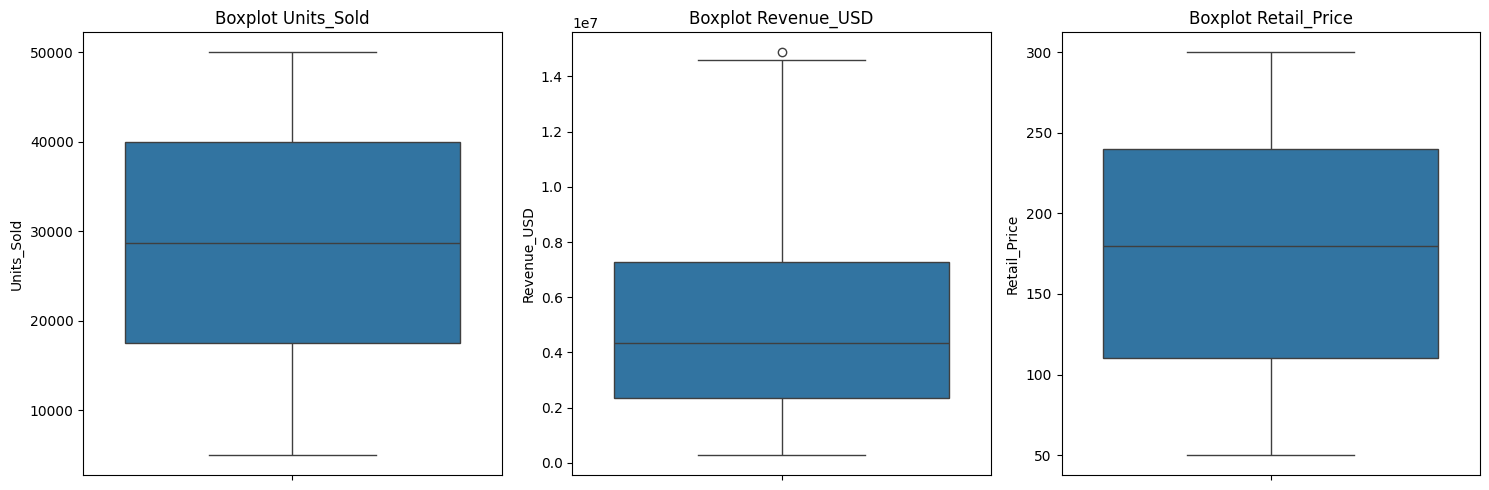

In [222]:
# Cek outlier pada data numerik Units_Sold', 'Revenue_USD', 'Retail_Price
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axes, ['Units_Sold', 'Revenue_USD', 'Retail_Price']):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

Hasil menunjukkkan Revenue memiliki outlier, yang bisa diselidiki lebih lanjut dimana, produk tertentu memiliki harga sangat tinggi atau penjualan sangat besar. untuk Distribusi Units Sold dan Retail Price tampak cukup normal, tanpa indikasi outlier signifikan.

In [223]:
# Menampilkan nilai unik
print(df['Region'].unique())
print(df['Main_Category'].unique())
print(df['Price_Tier'].unique())

['India' 'Greater China' 'Japan' 'Europe' 'South Korea' 'America'
 'Southeast Asia']
['Equipment' 'Apparel' 'Footwear']
['Budget' 'Mid-Range' 'Premium']


Pengecekan data outlier pada Online_Sales_Percentage sangat penting karena nilai ini tidak boleh lebih dari 100% atau kurang dari 0%. 

In [224]:
df[(df['Online_Sales_Percentage'] >= 0) & (df['Online_Sales_Percentage'] <= 100)]


,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160
...,...,...,...,...,...,...,...,...,...,...
995,October,India,Equipment,Accessories,Hats,Mid-Range,9870,987000,82,100
996,July,Europe,Equipment,Socks,Performance Socks,Mid-Range,14668,2640240,88,180
997,August,Japan,Footwear,Football,Phantom Vision,Premium,15078,2261700,74,150
998,May,South Korea,Equipment,Socks,Crew Socks,Premium,26242,1312100,52,50


Hasil menunjukkan 1000 rows yang artinya semua data pada kolom Online_Sales_Percentage tidak ada yang melebihi dari 100%. Proses Selanjutnya akan mengecek karakter unik pada setiap Kolom.

In [225]:
# Melihat jumlah kategori unik di setiap kolom
df[['Month', 'Region', 'Main_Category', 'Sub_Category', 'Product_Line', 'Price_Tier']].nunique()

Month            12
Region            7
Main_Category     3
Sub_Category     11
Product_Line     24
Price_Tier        3
dtype: int64

Untuk memastikan tidak ada typo dalam penulisan, maka dilakukan pengecekan memastikan penulisan benar.

In [226]:
# Memastikan tidak ada kesalahan penulisan
for col in ['Month', 'Region', 'Main_Category', 'Sub_Category', 'Product_Line', 'Price_Tier']:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Month: ['November' 'January' 'October' 'December' 'May' 'July' 'April' 'February'
 'September' 'June' 'March' 'August']
Unique values in Region: ['India' 'Greater China' 'Japan' 'Europe' 'South Korea' 'America'
 'Southeast Asia']
Unique values in Main_Category: ['Equipment' 'Apparel' 'Footwear']
Unique values in Sub_Category: ['Bags' 'Accessories' 'Tops' 'Cricket' 'Socks' 'Performance' 'Outerwear'
 'Lifestyle' 'Running' 'Basketball' 'Football']
Unique values in Product_Line: ['Gym Sack' 'Hats' 'Tech Fleece' 'Vapor Cricket' 'Performance Socks'
 'Dri-FIT' 'Therma-FIT' 'Bags' 'Crew Socks' 'Backpack' 'Rain Jacket'
 'Air Force 1' 'React Infinity' 'Windrunner' 'Air Jordan'
 'Compression Wear' 'Air Zoom' 'Mercurial' 'Air Max' 'KD Series'
 'LeBron Series' 'Phantom Vision' 'Blazer' 'Pegasus']
Unique values in Price_Tier: ['Budget' 'Mid-Range' 'Premium']


Hasil penulisan sudah sesuai tidak ada keselahan penuliasan, Lalu menampilkan karakter unik pada kolom region.

In [ ]:
# Cek karakter unik pada kolom region
df['Region'].value_counts()

Region
Greater China     161
America           147
South Korea       146
India             145
Japan             144
Europe            133
Southeast Asia    124
Name: count, dtype: int64

Proses selanjutnya untuk menghilangkan data outlier pada kolom Revenue_USD

In [228]:
outliers = df[(stats.zscore(df['Revenue_USD']) > 3) | (stats.zscore(df['Revenue_USD']) < -3)]

print(outliers)

        Month   Region Main_Category Sub_Category   Product_Line Price_Tier  \
213  February  America      Footwear      Cricket  Vapor Cricket  Mid-Range   

     Units_Sold  Revenue_USD  Online_Sales_Percentage  Retail_Price  
213       49549     14864700                       75           300  


Hasil menunjukkan data outlier yang terdeteksi adalah baris 213, dengan Revenue_USD sebesar 14,864,700, yang jauh lebih tinggi dibandingkan data lainnya.Nilai Revenue_USD memiliki titik yang berada di luar batas IQR atau memiliki Z-score dimana nilainya lebih dari 3, maka dapat disimpulkan bahwa Revenue_USD memiliki outlier, Proses selanjutnya untuk menghilangkan 1 data outlier.

In [229]:
# Hapus 1 baris dengan index 1
data_cleaned = df.drop(index=213)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    999 non-null    object
 1   Region                   999 non-null    object
 2   Main_Category            999 non-null    object
 3   Sub_Category             999 non-null    object
 4   Product_Line             999 non-null    object
 5   Price_Tier               999 non-null    object
 6   Units_Sold               999 non-null    int64 
 7   Revenue_USD              999 non-null    int64 
 8   Online_Sales_Percentage  999 non-null    int64 
 9   Retail_Price             999 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Selanjutnya melakukan penyimpanan data ke dalam CSV

In [230]:
# menyimpan data menjadi csv tanpa index
data_cleaned.to_csv('nike_data_cleaned.csv', index=False)

Hasil setelah yang dibuang outliernya dengan menghasilkan 999 data, untuk siap dianalisa lebih lanjut.

# C. Analisis dan perhitungan

## C. 1. Mengetahui nilai rata-rata penjualan perwilayah

In [259]:
# Menghitung rata-rata dan standar deviasi penjualan per wilayah
stats_by_region = data_cleaned.groupby('Region')['Units_Sold'].agg(['mean']).reset_index()

# Menampilkan hasil
stats_by_region

,Region,mean
0,America,29188.006849
1,Europe,27920.969925
2,Greater China,29083.000000
3,India,28239.717241
4,Japan,29475.784722
5,South Korea,28259.068493
6,Southeast Asia,26830.685484


Southeast Asia memiliki rata-rata penjualan terendah (26,830 unit), sementara Japan tertinggi (29,475 unit). Wilayah lain berada di kisaran 28,000–29,000 unit. Ini menunjukkan potensi perbaikan strategi di Southeast Asia untuk meningkatkan permintaan dan daya saing.

## C. 2. Pengaruh harga terhadap volume penjualan

'''
untuk menjawab pertanyaan tersebut terlebih dahulu membuat hipotesanya:
H0 : Tidak terdapat pengaruh signifikan antara harga terhadap volume penjualan?
H1 : Terdapat pengaruh signifikan antara harga terhadap volume penjualan

In [260]:
# Menghitung korelasi Pearson dan p-value
pearson_corr, p_value = pearsonr(data_cleaned['Retail_Price'], data_cleaned['Units_Sold'])

# Menampilkan hasil
print(f'Korelasi Pearson: {pearson_corr:.3f}')
print(f'p-value: {p_value:.3f}')

# Menguji hipotesis
if p_value <= 0.05:
    print("H₀ ditolak. Terdapat pengaruh signifikan antara harga dan volume penjualan.")
else:
    print("H₀ gagal ditolak. Tidak terdapat pengaruh signifikan antara harga dan volume penjualan.")

Korelasi Pearson: 0.012
p-value: 0.695
H₀ gagal ditolak. Tidak terdapat pengaruh signifikan antara harga dan volume penjualan.


Nilai Korelasi Pearson sebesar 0.012 yang sangat dekat dengan 0 menunjukkan bahwa hubungan antara harga dan volume penjualan sangat lemah atau hampir tidak ada. Korelasi ini menunjukkan bahwa perubahan harga hampir tidak mempengaruhi volume penjualan secara linear. 

## C. 3. Mengetahui Wilayah mana yang memiliki penurunan ditribusi penjualan paling rendah

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6388\1015269972.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_cleaned['Region'], palette='viridis')


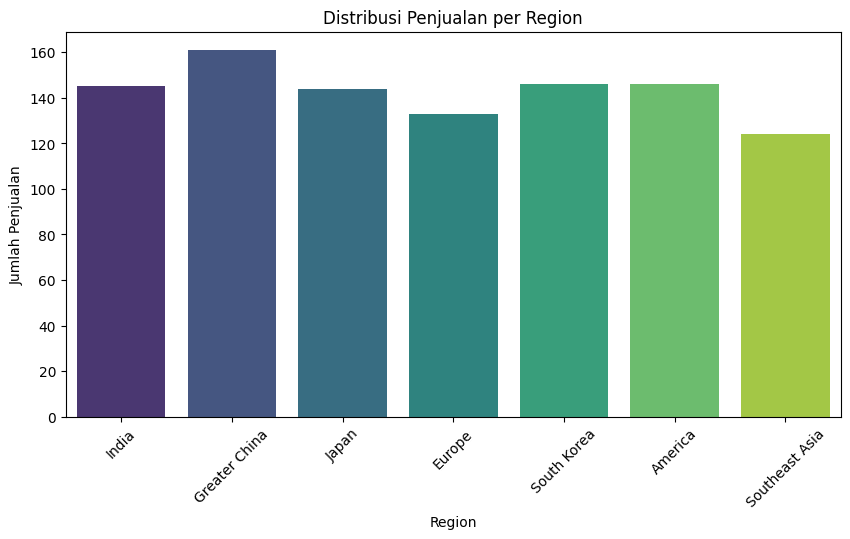

In [231]:
# Membuat countplot untuk melihat jumlah data di setiap region
plt.figure(figsize=(10,5))
sns.countplot(x=data_cleaned['Region'], palette='viridis')

# Tambahkan judul dan label sumbu
plt.title('Distribusi Penjualan per Region')
plt.xlabel('Region')
plt.ylabel('Jumlah Penjualan')

plt.xticks(rotation=45)  # Jika nama region panjang, miringkan label
plt.show()

Bar chart ini menunjukkan distribusi penjualan per wilayah, di mana Greater China mencatat jumlah penjualan tertinggi, sementara Southeast Asia memiliki penjualan terendah. Wilayah lainnya memiliki distribusi yang relatif seimbang. Hal ini menunjukkan potensi peningkatan strategi pemasaran atau penetrasi pasar di Southeast Asia untuk meningkatkan angka penjualan.

## C. 4. Mengetahui Produk atau kategori apa yang memiliki tingkat penjualan rendah

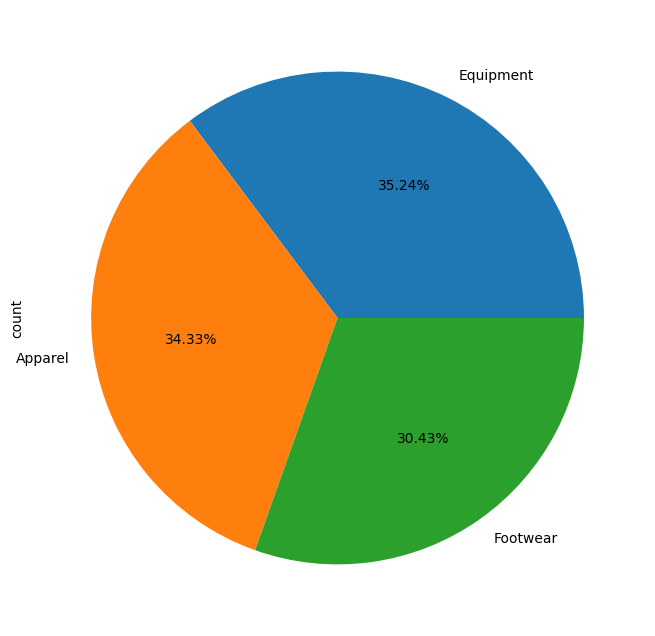

In [232]:
fig,ax1 = plt.subplots(figsize=(8,8))

data_cleaned['Main_Category'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Pie chart ini menunjukkan distribusi penjualan berdasarkan kategori produk. Equipment memiliki kontribusi terbesar (35.24%), diikuti oleh Apparel (34.33%), dan Footwear memiliki porsi terkecil (30.43%). Ini menunjukkan bahwa Equipment dan Apparel memiliki hampir kontribusi yang sama dalam penjualan, sementara Footwear sedikit lebih rendah.

## C. 5. Mengetahui Pada bulan berapa persentase penjualan online mengalami penurunan

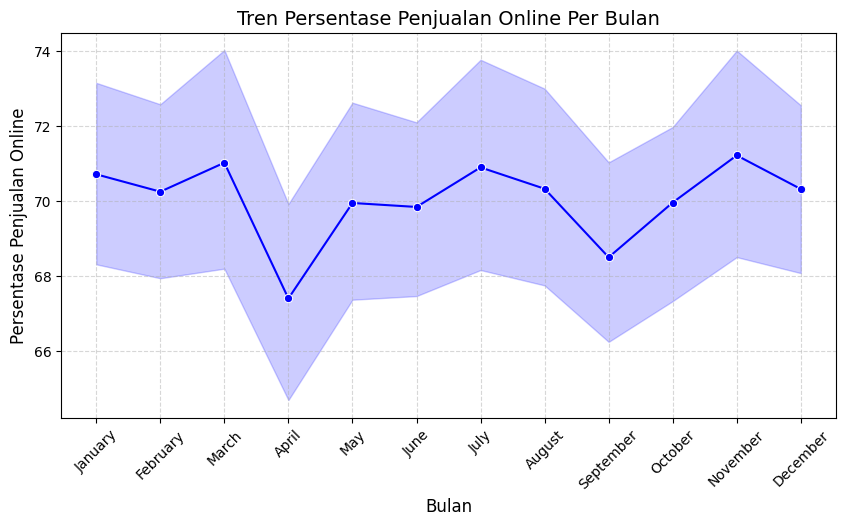

In [281]:
bulan_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

data_cleaned['Month'] = pd.Categorical(data_cleaned['Month'], categories=bulan_order, ordered=True)

# Plot dengan urutan bulan yang benar
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_cleaned, x='Month', y='Online_Sales_Percentage', marker='o', color='b')

plt.title('Tren Persentase Penjualan Online Per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Persentase Penjualan Online', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## C. 6. Mengetahui Pola penjualan dalam setahun

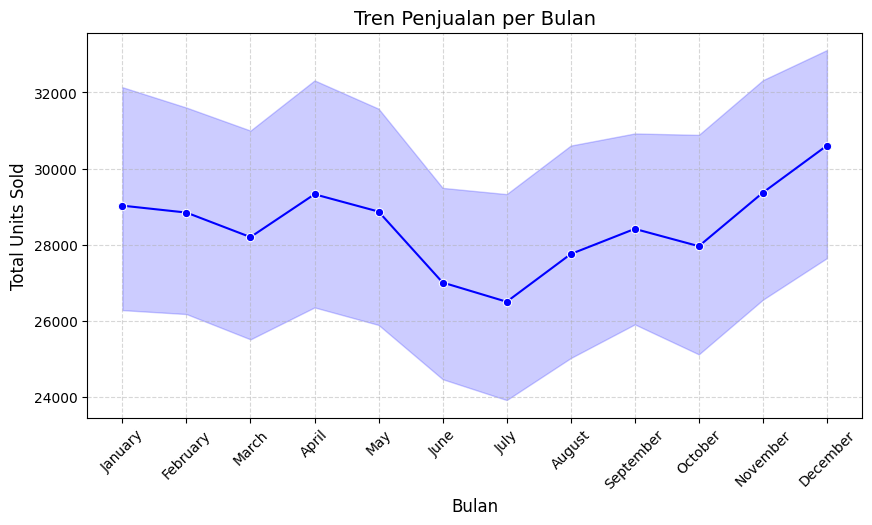

In [278]:
bulan_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

data_cleaned['Month'] = pd.Categorical(data_cleaned['Month'], categories=bulan_order, ordered=True)

# Plot dengan urutan bulan yang benar
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_cleaned, x='Month', y='Units_Sold', marker='o', color='b')

plt.title('Tren Penjualan per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Dari line chart penjualan sepanjang tahun naik turun dengan puncak di Mei, April, dan Desember, serta penurunan signifikan di Juni dan Juli, sehingga strategi pemasaran perlu diperkuat di bulan-bulan dengan penjualan rendah.

# D. Kesimpulan

- Meningkatkan strategi pemasaran dan promosi di wilayah ini di Southeast Asia, kategori Footwear memiliki porsi terendah, sehingga perlu inovasi desain atau strategi pemasaran yang lebih agresif.
- Menyesuaikan Kampanye Berdasarkan Musim :
Puncak penjualan di Mei, April, dan Desember menunjukkan bahwa kampanye besar harus diperkuat sebelum bulan-bulan ini.
Penjualan rendah di Juni dan Juli bisa diatasi dengan diskon musiman atau promosi khusus untuk menarik lebih banyak pelanggan.
